# Implementaci√≥n del m√©todo

Este notebook muestra paso a paso c√≥mo funciona el m√©todo de parametrizaci√≥n para el mapeo est√°ndar. Recordemos que antes ya se calcularon los puntos fijos del mapeo y se hizo un an√°lisis de los mismos por lo que nos concentraremos en s√≥lo aplicar de manera clara y paso a paso el m√©todo. Hacerlo de esta manera nos ayudar√° a comprender mejor c√≥mo se implement√≥ m√©todo de manera general. 
Dado que conocemos ya los puntos fijos entonces nos concentraremos en calcular la variedad inestable, la cual se podr√° elegir en t√©rminos de escoger el valor propio con el signo negativo que ya se calcul√≥ en el N3. 

En primer lugar hay que notar que como queremos implementar eso de manera general tenemos que hacer el c√°lculo de los valores propios en un inicio. Luego de esto se puede proceder con el calculo de cada variedad. 


Como ya sabemos cu√°les son los puntos fijos necesitamos ahora calcular los polinomios que ser√°n la parametrizaci√≥n de la variedad.Para ello debemos resolver la ecuaci√≥n de invariancia.
$$F_{\epsilon}\circ P=P\circ \lambda$$

In [1]:
#usaremos el paquete de TaylorSeries
using TaylorSeries


In [3]:
#necesitamos tambien definir el mapeo standar 
"""EstandarMap(Œ∏,p,k)
   
   Funci√≥n que define el mapeo est√°ndar.
  

   Argumentos:
   -Œ∏ : posici√≥n
   -p : momento
   -k : constante del mapeo
"""
function EstandarMap(Œ∏,p,k)
    
    Œ∏_n = mod2pi(Œ∏+p)
    p_n = mod2pi(p+k*sin(Œ∏_n))
    
    return [Œ∏_n,p_n]
    
    
end


    

EstandarMap

Definimos el valor de la constante del mapeo que usaremos en este caso. 

In [4]:
ke=0.3

0.3

                                                     
                                                    ORDEN 1 


Dado que queremos que $T_{x}$, $T_{p}$ sean polinomios necesitamos construirlos como dos polinomios de los cuales solo sabemos su primer coeficiente pero la idea es ir calculando los t√©rminos en cada iteraci√≥n. Escribirmos los coeficientes que buscamos como un polinomio a su vez de orden mayor a uno.

In [5]:
#Queremos que los polinomios para Œ∏, p sean de orden uno, eso no influye en el orden del coeficiente que estamos calculando
Œ∏,p = set_variables(Float64,"Œ∏ p",order=2)

2-element Array{TaylorSeries.TaylorN{Float64},1}:
  1.0 Œ∏ + ùí™(‚Äñx‚Äñ¬≥)
  1.0 p + ùí™(‚Äñx‚Äñ¬≥)

In [6]:
#Ahora necesitamos los polinomios que parametrizan a las variedades en espec√≠fico, estos ser√°n tipo Taylor1.TaylorN
P_Œ∏=Taylor1([Œ∏], 1)
P_p=Taylor1([p], 1)
#el orden de estos ya es importante para cada iteraci√≥n, aqu√≠ es uno porque estamos en el coeficiente de primer grado
print(P_Œ∏,P_p)


  1.0 Œ∏ + ùí™(‚Äñx‚Äñ¬≥) + ùí™(t¬≤)  1.0 p + ùí™(‚Äñx‚Äñ¬≥) + ùí™(t¬≤)

In [7]:
#Aplicamos el mapeo a estos dos polinomios
Orden1=EstandarMap(P_Œ∏,P_p,ke)

2-element Array{TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}},1}:
   1.0 Œ∏ + 1.0 p + ùí™(‚Äñx‚Äñ¬≥) + ùí™(t¬≤)
   0.3 Œ∏ + 1.3 p + ùí™(‚Äñx‚Äñ¬≥) + ùí™(t¬≤)

Hasta este momento tenemos calculado la parte de la ecuaci√≥n cohomol√≥gica que corresponde a la composici√≥n de $f_{\epsilon} \circ P$, es decir creamos un arreglo de polinomios P que despu√©s evaluamos en la funci√≥n $f_{\epsilon}$. Construiremos la otra composici√≥n que aparece en la ecuaci√≥n cohomol√≥gica m√°s adelante. Antes de eso debemos pensar c√≥mo se resolver√° esta ecuaci√≥n, la forma m√°s f√°cil es escribirla como un sistema en forma matricial. 
$$\mathbb{A}\textbf{v}=\textbf{w} $$
Donde la matriz A contiene los coeficientes que aparecen en los polinomios de acuerdo a cada variable. Mientras que la x representa el vector $(\theta,p)$ y $w$ el vector de t√©rminos independientes de los polinomios. 

Para escribirlo de esta manera usaremos una funci√≥n dentro de TaylorSeries que es el jacobiano. El jacobiano como recordamos es una matriz formada por las derivadas parciales de los dos polinomios para cada una de las variables. En este caso dos variables y dos polinomios nos llevan a una matriz de $2 \times 2$ formada por :
$$ \left( \begin{array}{cc}
\frac{\partial f_{x}}{\partial \theta} & \frac{\partial f_{p}}{\partial \theta}  \\
\frac{\partial f_{x}}{\partial p} & \frac{\partial f_{p}}{\partial p}  \end{array} \right) $$

In [8]:
#al calcular el jacobiano obtendremos s√≥lo los valores de los coeficientes los cuales 
# son de tipo TaylorN
JPO=jacobian(Orden1)


2√ó2 Array{TaylorSeries.Taylor1{Float64},2}:
  1.0 + ùí™(t¬≤)   1.0 + ùí™(t¬≤)
  0.3 + ùí™(t¬≤)   1.3 + ùí™(t¬≤)

In [9]:
#como los valores que contiene el jacobiano son de tipo TaylorN y para usarlos como necesitamos
# se deben tener en Float64 vamos a obtenerlos de la siguente manera. 
JacFl = Array{Float64}(2,2)
for ind in eachindex(JPO)
                JacFl[ind] = JPO[ind].coeffs[1]
end
#usamos la matriz JacFl como auxiliar para encontrar los valores flotantes
@show(JacFl)

JacFl = [1.0 1.0; 0.3 1.3]


2√ó2 Array{Float64,2}:
 1.0  1.0
 0.3  1.3

La matriz que aparece arriba es una que ya podemos usar para calcular los valores y vectores propios. Necesitamos s√≥lo uno de ellos.

In [10]:
# eig () es una funci√≥n que calcula los valores y vectores propios de una matriz y los da en ese orden en forma de vector.
JPO=JacFl
eval,eve=eig(JPO)

([0.582109, 1.71789], [-0.922675 -0.812346; 0.385578 -0.583176])

In [11]:
# dado que usaremos la variedad inestable, entonces usamos el segundo valor propio
Œª=eval[2]
print(Œª,eve)



1.7178908345800274[-0.922675 -0.812346; 0.385578 -0.583176]

Tomamos por ende el segundo vector propio, los coeficientes de este vector ser√°n los coeficientes de primer orden en los polinomios. 

In [12]:
vec=eve[:,2]
# decimos que vec es un arreglo de contiene los valores correspondientes a los lugares [1,2], [2,2] de eve.

2-element Array{Float64,1}:
 -0.812346
 -0.583176

In [13]:
#queremos revisar la estabilidad de tipo de las variables PŒ∏,x
@show(P_Œ∏)
@show(typeof(P_Œ∏))
@show(Orden1[1])
@show(typeof(Orden1[1]))


P_Œ∏ =   1.0 Œ∏ + ùí™(‚Äñx‚Äñ¬≥) + ùí™(t¬≤)
typeof(P_Œ∏) = TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}
Orden1[1] =   1.0 Œ∏ + 1.0 p + ùí™(‚Äñx‚Äñ¬≥) + ùí™(t¬≤)
typeof(Orden1[1]) = TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}


TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}

                                                  ORDEN 2

A partir de este t√©rmino la forma de obtener los coeficientes se vuelve mon√≥tona, esto facilita que podamos sintetizar
todos los pasos en funciones. Antes de eso calcularemos cada t√©rmino por separado. La forma de comenzar a calcular cada coeficiente no cambia con respecto al primero. 

In [16]:

#Queremos hacer la misma idea para este orden, recordemos que el orden de este polinomio no influye por ahora en el c√°lculo
# ya que en los t√©rminos que no aparecen expl√≠citamente sirven para justo calcular la parte que no conocemos.

Œ∏,p = set_variables(Float64,"Œ∏ p",order=1)

2-element Array{TaylorSeries.TaylorN{Float64},1}:
  1.0 Œ∏ + ùí™(‚Äñx‚Äñ¬≤)
  1.0 p + ùí™(‚Äñx‚Äñ¬≤)

Para los nuevos polinomios agregamos los valores que calculamos en el paso anterior, adem√°s de las variables x,p como series de Taylor.

In [17]:
#usamos los valores ya calculados en el orden 1 para x,p de primer orden, estos los incluyo en una lista junto 
#con  el polinomio que representa a x,p  tipo TaylorN 
P_Œ∏=Taylor1([0.,vec[1],Œ∏],2)
P_p=Taylor1([0.,vec[2],p],2)

 ( - 0.5831757547123116 + ùí™(‚Äñx‚Äñ¬π)) t + ( 1.0 p + ùí™(‚Äñx‚Äñ¬≤)) t¬≤ + ùí™(t¬≥)

In [18]:
#aplicamos el mapeo
SO=EstandarMap(P_Œ∏,P_p,ke)

2-element Array{TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}},1}:
  ( - 1.3955217641908624 + ùí™(‚Äñx‚Äñ¬π)) t + ( 1.0 Œ∏ + 1.0 p + ùí™(‚Äñx‚Äñ¬≤)) t¬≤ + ùí™(t¬≥)
  ( - 1.0018322839695704 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.3 Œ∏ + 1.3 p + ùí™(‚Äñx‚Äñ¬≤)) t¬≤ + ùí™(t¬≥)

Para el lado derecho de la ecuaci√≥n cohomol√≥gica necesitamos un vector de lambdas, pues recordemos  
$$ \Sigma_{n=1}^{\inf}a_{n}t^{n}\lambda^{n}$$
$$\Sigma_{n=1}^{\inf}b_{n}t^{n}\lambda^{n}$$


In [19]:
# como nos falta el otro lado de la ecuaci√≥n cohomol√≥gica definimos un vector de lambdas
vŒª=[0.0,Œª,Œª^2]

3-element Array{Float64,1}:
 0.0    
 1.71789
 2.95115

In [20]:
#y definimos tambi√©n un polinomio para las lambdas, del mismo orden que el polinomio de P_Œ∏,P_p
# que juega la parte de a_{n}\lambda^{n}
Œ∏Œªt=Taylor1(vŒª.*[0.,vec[1],Œ∏],2)
pŒªt=Taylor1(vŒª.*[0.,vec[2],p],2)
Œªvec=[Œ∏Œªt,pŒªt]

2-element Array{TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}},1}:
  ( - 1.3955217641908624 + ùí™(‚Äñx‚Äñ¬π)) t + ( 2.9511489195340634 Œ∏ + ùí™(‚Äñx‚Äñ¬≤)) t¬≤ + ùí™(t¬≥)
  ( - 1.0018322839695704 + ùí™(‚Äñx‚Äñ¬π)) t + ( 2.9511489195340634 p + ùí™(‚Äñx‚Äñ¬≤)) t¬≤ + ùí™(t¬≥)

Ahora ya tengo las dos partes de la ecuaci√≥n y debo igualarlas para resolver. SO representa la parte de la primera
 composici√≥n mientras que $Œªvec$ representa la parte derecha de la ecuaci√≥n de invariancia. Al restarlas estoy resolviendo 
 $$f_{\epsilon}\circ P- P \circ \lambda=0 $$. En este caso no esta igualada a cero puesto que estamos tratando de calcular el siguente t√©rmino, es decir van a diferir justo en ese t√©rmino. 

In [21]:
#Restando ambos vectores que representan la ecuaci√≥n cohomol√≥gica encontraremos los t√©rminos que faltan
# de empatar
Ecua=SO-Œªvec


2-element Array{TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}},1}:
  ( - 1.9511489195340634 Œ∏ + 1.0 p + ùí™(‚Äñx‚Äñ¬≤)) t¬≤ + ùí™(t¬≥)
    ( 0.3 Œ∏ - 1.6511489195340634 p + ùí™(‚Äñx‚Äñ¬≤)) t¬≤ + ùí™(t¬≥)

En este paso nos podemos dar cuenta que s√≥lo aprece el t√©rmino de orden dos puesto que el de orden uno ya lo calculamos. 

Notemos que hay un peque√±o error, pues aparece un n√∫mero en el polinomio asociado a $\theta$ de orden 1, sin embargo este n√∫mero es del orden de $10^{-16}$ lo cual nos dice que es un error num√©rico.

In [22]:

# de esta ecuaci√≥n necesitamos solo los de segundo orden, as√≠ que los extraemos manualmente 
Œ∏2=Ecua[1].coeffs[3]
p2=Ecua[2].coeffs[3]
vec2=[Œ∏2,p2]

2-element Array{TaylorSeries.TaylorN{Float64},1}:
  - 1.9511489195340634 Œ∏ + 1.0 p + ùí™(‚Äñx‚Äñ¬≤)
    0.3 Œ∏ - 1.6511489195340634 p + ùí™(‚Äñx‚Äñ¬≤)

In [23]:
#calculamos ahora el jacobiano de este vector, ya que los coeficientes ser√°n parte de la matriz que queremos
JSO=jacobian(vec2)

2√ó2 Array{Float64,2}:
 -1.95115   1.0    
  0.3      -1.65115

In [24]:
#calculamos su determinante para ver si es cero, 
det(JSO)

2.9216374303387243

In [25]:
# como es distinto de cero y la ecuaci√≥n esta igualada a cero entonces la √∫nica soluci√≥n es la trivial
Œ∏2=0.
p2=0.
vec2=[0.,0.]


2-element Array{Float64,1}:
 0.0
 0.0

Esto concuerda con lo que hab√≠amos encontrado antes, los coeficientes de orden par son cero. 

In [26]:
#queremos revisar la estabilidad de las variables tx,x
@show(P_Œ∏)
@show(typeof(P_Œ∏))
@show(SO[1])
@show(typeof(SO[1]))
@show(Œ∏Œªt)
@show(typeof(Œ∏Œªt))
@show(Ecua[1])
@show(typeof(Ecua[1]))

P_Œ∏ =  ( - 0.8123460094785507 + ùí™(‚Äñx‚Äñ¬π)) t + ( 1.0 Œ∏ + ùí™(‚Äñx‚Äñ¬≤)) t¬≤ + ùí™(t¬≥)
typeof(P_Œ∏) = TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}
SO[1] =  ( - 1.3955217641908624 + ùí™(‚Äñx‚Äñ¬π)) t + ( 1.0 Œ∏ + 1.0 p + ùí™(‚Äñx‚Äñ¬≤)) t¬≤ + ùí™(t¬≥)
typeof(SO[1]) = TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}
Œ∏Œªt =  ( - 1.3955217641908624 + ùí™(‚Äñx‚Äñ¬π)) t + ( 2.9511489195340634 Œ∏ + ùí™(‚Äñx‚Äñ¬≤)) t¬≤ + ùí™(t¬≥)
typeof(Œ∏Œªt) = TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}
Ecua[1] =  ( - 1.9511489195340634 Œ∏ + 1.0 p + ùí™(‚Äñx‚Äñ¬≤)) t¬≤ + ùí™(t¬≥)
typeof(Ecua[1]) = TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}


TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}

                                                ORDEN 3

Para este orden comenzaremos a generar los vectores como en el caso anterior, lo que cambia en este caso es que
aparecen t√©rminos independientes en la ecuaci√≥n comohol√≥gica. Esto resulta en que las soluci√≥n ya no ser√° la trivial como en el caso pasado.

In [27]:
#genramos un par de variables de tipo TaylorN de orden 3
Œ∏,p = set_variables(Float64,"Œ∏ p",order=3)


2-element Array{TaylorSeries.TaylorN{Float64},1}:
  1.0 Œ∏ + ùí™(‚Äñx‚Äñ‚Å¥)
  1.0 p + ùí™(‚Äñx‚Äñ‚Å¥)

In [28]:
#generamos las variables con las que evaluamos el mapeo, notemos que deben de tener orden mayor al orden que estamos 
# calculando
P_Œ∏=Taylor1([0.,vec[1],Œ∏2,Œ∏],4)
P_p=Taylor1([0.,vec[2],p2,p],4)


 ( - 0.5831757547123116 + ùí™(‚Äñx‚Äñ¬π)) t + ( 1.0 p + ùí™(‚Äñx‚Äñ‚Å¥)) t¬≥ + ùí™(t‚Åµ)

In [29]:
#aplicamos el mapeo 
TO=EstandarMap(P_Œ∏,P_p,ke)


2-element Array{TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}},1}:
                       ( - 1.3955217641908624 + ùí™(‚Äñx‚Äñ¬π)) t + ( 1.0 Œ∏ + 1.0 p + ùí™(‚Äñx‚Äñ‚Å¥)) t¬≥ + ùí™(t‚Åµ)
  ( - 1.0018322839695704 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.1358876056468051 + 0.3 Œ∏ + 1.3 p + ùí™(‚Äñx‚Äñ‚Å¥)) t¬≥ + ùí™(t‚Åµ)

In [30]:
#creamos un vector de lambdas que formar√° parte del lado derecho de la ecuaci√≥n cohomo.
vŒª=[0,Œª,Œª^2, Œª^3]
Œ∏Œªt=Taylor1([0.,vec[1],Œ∏2,Œ∏].*vŒª,4)
pŒªt=Taylor1([0.,vec[2],p2,p].*vŒª,4)



 ( - 1.0018322839695704 + ùí™(‚Äñx‚Äñ¬π)) t + ( 5.069751680348318 p + ùí™(‚Äñx‚Äñ‚Å¥)) t¬≥ + ùí™(t‚Åµ)

In [31]:
#lo usaremos como vector pues el mapeo regresa un vector
Œªvec=[Œ∏Œªt,pŒªt]


2-element Array{TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}},1}:
  ( - 1.3955217641908624 + ùí™(‚Äñx‚Äñ¬π)) t + ( 5.069751680348318 Œ∏ + ùí™(‚Äñx‚Äñ‚Å¥)) t¬≥ + ùí™(t‚Åµ)
  ( - 1.0018322839695704 + ùí™(‚Äñx‚Äñ¬π)) t + ( 5.069751680348318 p + ùí™(‚Äñx‚Äñ‚Å¥)) t¬≥ + ùí™(t‚Åµ)

In [32]:
#Escribimos la ecuaci√≥n cohomo
Ecua=TO-Œªvec


2-element Array{TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}},1}:
                      ( - 4.069751680348318 Œ∏ + 1.0 p + ùí™(‚Äñx‚Äñ‚Å¥)) t¬≥ + ùí™(t‚Åµ)
  ( 0.1358876056468051 + 0.3 Œ∏ - 3.7697516803483184 p + ùí™(‚Äñx‚Äñ‚Å¥)) t¬≥ + ùí™(t‚Åµ)

In [33]:
#notamos de nuevo que s√≥lo sobreviven los t√©rminos de orden 3 y que hay un peque√±o error en el t√©rmino 1 
Œ∏3=Ecua[1].coeffs[4]
p3=Ecua[2].coeffs[4]

 0.1358876056468051 + 0.3 Œ∏ - 3.7697516803483184 p + ùí™(‚Äñx‚Äñ‚Å¥)

In [34]:
#Dado que en este momento comienzan a aparecer t√©rminos independientes en x, p necesitamos una forma de extraerlos
# primero estraemos los coeficientes de x, p como antes con el jacobiano. 
JTO=jacobian([Œ∏3,p3])

2√ó2 Array{Float64,2}:
 -4.06975   1.0    
  0.3      -3.76975

In [35]:
#calculamos el determinante 
det(JTO)

15.041953235593466

In [36]:

#extraemos ahora los coeficientes independientes de x,p 
a= Ecua[1].coeffs[4].coeffs[1].coeffs[1]
b= Ecua[2].coeffs[4].coeffs[1].coeffs[1]
vecCoef=[-a,-b]


2-element Array{Float64,1}:
 -0.0     
 -0.135888

Dado que el determinante de la matriz es distinto de cero y los t√©rminos independientes son diferentes de cero entonces existe una soluci√≥n no trivial. Para resolver este sitema utilizamos que :
$$JTO [\theta, p]^{T}=[a,b]^{T}$$
$$[\theta, p]^{T}=JTO^{-1}[a,b]^{T}$$

In [37]:

# entonces solo se trata de invertir el jacobiano y multiplicar con el vector del lado izquierdo
T3=JTO \ vecCoef


2-element Array{Float64,1}:
 0.00903391
 0.0367658 

In [38]:
#los valores que obtuvimos son los nuevos coeficientes de orden 3
Œ∏3=T3[1]
p3=T3[2]
v3=[Œ∏3,p3]

2-element Array{Float64,1}:
 0.00903391
 0.0367658 

In [39]:
#queremos revisar la estabilidad de las variables tx,x
@show(P_Œ∏)
@show(typeof(P_Œ∏))
@show(TO[1])
@show(typeof(TO[1]))
@show(Œ∏Œªt)
@show(typeof(Œ∏Œªt))
@show(Ecua[1])
@show(typeof(Ecua[1]))

P_Œ∏ =  ( - 0.8123460094785507 + ùí™(‚Äñx‚Äñ¬π)) t + ( 1.0 Œ∏ + ùí™(‚Äñx‚Äñ‚Å¥)) t¬≥ + ùí™(t‚Åµ)
typeof(P_Œ∏) = TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}
TO[1] =  ( - 1.3955217641908624 + ùí™(‚Äñx‚Äñ¬π)) t + ( 1.0 Œ∏ + 1.0 p + ùí™(‚Äñx‚Äñ‚Å¥)) t¬≥ + ùí™(t‚Åµ)
typeof(TO[1]) = TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}
Œ∏Œªt =  ( - 1.3955217641908624 + ùí™(‚Äñx‚Äñ¬π)) t + ( 5.069751680348318 Œ∏ + ùí™(‚Äñx‚Äñ‚Å¥)) t¬≥ + ùí™(t‚Åµ)
typeof(Œ∏Œªt) = TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}
Ecua[1] =  ( - 4.069751680348318 Œ∏ + 1.0 p + ùí™(‚Äñx‚Äñ‚Å¥)) t¬≥ + ùí™(t‚Åµ)
typeof(Ecua[1]) = TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}


TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}

                                                        ORDEN 4

In [40]:
#creamos las variables de tipo TaylorN
Œ∏,p = set_variables(Float64,"Œ∏ p",order=1)


2-element Array{TaylorSeries.TaylorN{Float64},1}:
  1.0 Œ∏ + ùí™(‚Äñx‚Äñ¬≤)
  1.0 p + ùí™(‚Äñx‚Äñ¬≤)

In [41]:
#creamos las variables del mapeo que ya toman en cuenta los coeficientes que calculamos
P_Œ∏=Taylor1([0.,vec[1],Œ∏2,Œ∏3,Œ∏],5)
P_p=Taylor1([0.,vec[2],p2,p3,p],5)


 ( - 0.5831757547123116 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.036765757927698775 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( 1.0 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Å¥ + ùí™(t‚Å∂)

In [46]:
#Le aplicamos el mapeo est√°ndar
CO=EstandarMap(P_Œ∏,P_p,ke)


2-element Array{TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}},1}:
                                           ( - 1.3955217641908624 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.04579966486242166 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( 1.0 Œ∏ + 1.0 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Å¥ + ùí™(t‚Å∂)
  ( - 1.0018322839695704 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.18639326303323034 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( 0.3 Œ∏ + 1.3 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Å¥ + ( - 0.026611022998050755 + ùí™(‚Äñx‚Äñ¬≤)) t‚Åµ + ùí™(t‚Å∂)

In [49]:
#creamos la parte derecha de la ecuaci√≥n
vŒª=[0., Œª, Œª^2, Œª^3, Œª^4]
Œ∏Œªt=Taylor1([0.,vec[1],Œ∏2,Œ∏3,Œ∏].*vŒª,5)
pŒªt=Taylor1([0.,vec[2],p2,p3,p].*vŒª,5)
print(xŒªt,pŒªt)


 ( - 1.3955217641908624 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.04579966486242166 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( 8.709279945267069 Œ∏ + ùí™(‚Äñx‚Äñ¬≤)) t‚Å¥ + ùí™(t‚Å∂) ( - 1.0018322839695704 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.18639326303323037 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( 8.709279945267069 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Å¥ + ùí™(t‚Å∂)

In [50]:
#es m√°s √∫til tener esta parte como un vector
Œªvec=[Œ∏Œªt,pŒªt]

2-element Array{TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}},1}:
  ( - 1.3955217641908624 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.04579966486242166 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( 8.709279945267069 Œ∏ + ùí™(‚Äñx‚Äñ¬≤)) t‚Å¥ + ùí™(t‚Å∂)
  ( - 1.0018322839695704 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.18639326303323037 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( 8.709279945267069 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Å¥ + ùí™(t‚Å∂)

In [51]:
#escribimos la ecuaci√≥n cohomo, para poder sacar el jacobiano
Ecua=CO-Œªvec


2-element Array{TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}},1}:
                                                                                    ( - 7.709279945267069 Œ∏ + 1.0 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Å¥ + ùí™(t‚Å∂)
  ( - 2.7755575615628914e-17 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( 0.3 Œ∏ - 7.409279945267069 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Å¥ + ( - 0.026611022998050755 + ùí™(‚Äñx‚Äñ¬≤)) t‚Åµ + ùí™(t‚Å∂)

In [52]:
#obtenemos los valores de orden 4 
Œ∏4=Ecua[1].coeffs[5]
p4=Ecua[2].coeffs[5]





 0.3 Œ∏ - 7.409279945267069 p + ùí™(‚Äñx‚Äñ¬≤)

In [53]:
#calculamos el jacobiano de estos t√©rminos, para obtener solo los coeficientes
JCO=jacobian([Œ∏4,p4])

2√ó2 Array{Float64,2}:
 -7.70928   1.0    
  0.3      -7.40928

In [54]:
#calculamos el determinante para saber si podemos resolver el sistema_
det(JCO)

56.8202132909169

In [55]:
#dado que el determinante es distinto de cero y los valores independientes del sistema son cero
# la √∫nica soluci√≥n es la trivial
T4=JCO\ [0.,0.]


2-element Array{Float64,1}:
 -0.0
 -0.0

In [57]:
#esta soluci√≥n son los nuevos coeficientes del polinomio
Œ∏4=T4[1]
p4=T4[2]

-0.0

De nuevo dado que es un t√©rmino de orden par, los coeficientes fueron cero.

In [58]:
#queremos revisar la estabilidad de las variables tx,x
@show(P_Œ∏)
@show(typeof(P_Œ∏))
@show(CO[1])
@show(typeof(CO[1]))
@show(Œ∏Œªt)
@show(typeof(Œ∏Œªt))
@show(Ecua[1])
@show(typeof(Ecua[1]))

P_Œ∏ =  ( - 0.8123460094785507 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.009033906934722882 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( 1.0 Œ∏ + ùí™(‚Äñx‚Äñ¬≤)) t‚Å¥ + ùí™(t‚Å∂)
typeof(P_Œ∏) = TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}
CO[1] =  ( - 1.3955217641908624 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.04579966486242166 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( 1.0 Œ∏ + 1.0 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Å¥ + ùí™(t‚Å∂)
typeof(CO[1]) = TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}
Œ∏Œªt =  ( - 1.3955217641908624 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.04579966486242166 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( 8.709279945267069 Œ∏ + ùí™(‚Äñx‚Äñ¬≤)) t‚Å¥ + ùí™(t‚Å∂)
typeof(Œ∏Œªt) = TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}
Ecua[1] =  ( - 7.709279945267069 Œ∏ + 1.0 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Å¥ + ùí™(t‚Å∂)
typeof(Ecua[1]) = TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}


TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}

                                                 QUINTO ORDEN

In [59]:
#creamos las variables que representan a x,p de tipo TaylorN
Œ∏,p = set_variables(Float64,"Œ∏ p",order=1)


2-element Array{TaylorSeries.TaylorN{Float64},1}:
  1.0 Œ∏ + ùí™(‚Äñx‚Äñ¬≤)
  1.0 p + ùí™(‚Äñx‚Äñ¬≤)

In [60]:
#definimos nuestros nuevos polinomios tomando en cuenta todos los coeficientes ya calculados
P_Œ∏=Taylor1([0.,vec[1],Œ∏2,Œ∏3,Œ∏4,Œ∏],6)
P_p=Taylor1([0.,vec[2],p2,p3,p4,p],6)


 ( - 0.5831757547123116 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.036765757927698775 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( 1.0 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Åµ + ùí™(t‚Å∑)

In [62]:
#aplicamos el mapeo
QO=EstandarMap(P_Œ∏,P_p,ke)

2-element Array{TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}},1}:
                           ( - 1.3955217641908624 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.04579966486242166 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( 1.0 Œ∏ + 1.0 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Åµ + ùí™(t‚Å∑)
  ( - 1.0018322839695704 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.18639326303323034 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( - 0.026611022998050755 + 0.3 Œ∏ + 1.3 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Åµ + ùí™(t‚Å∑)

In [64]:
#creamos la otra parte de la ecuaci√≥n cohomo
vŒª=[0.,Œª,Œª^2,Œª^3,Œª^4,Œª^5]
Œ∏Œªt=Taylor1([0.,vec[1],Œ∏2,Œ∏3,Œ∏4,Œ∏].*vŒª,6)
pŒªt=Taylor1([0.,vec[2],p2,p3,p4,p].*vŒª,6)
print(Œ∏Œªt,pŒªt)

 ( - 1.3955217641908624 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.04579966486242166 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( 14.96159219376594 Œ∏ + ùí™(‚Äñx‚Äñ¬≤)) t‚Åµ + ùí™(t‚Å∑) ( - 1.0018322839695704 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.18639326303323037 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( 14.96159219376594 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Åµ + ùí™(t‚Å∑)

In [65]:
#nos es m√°s √∫til como vector
Œªvec=[Œ∏Œªt,pŒªt]

2-element Array{TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}},1}:
  ( - 1.3955217641908624 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.04579966486242166 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( 14.96159219376594 Œ∏ + ùí™(‚Äñx‚Äñ¬≤)) t‚Åµ + ùí™(t‚Å∑)
  ( - 1.0018322839695704 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.18639326303323037 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( 14.96159219376594 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Åµ + ùí™(t‚Å∑)

In [66]:
#escribimos la ecuaci√≥n cohomo
Ecua=QO-Œªvec

2-element Array{TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}},1}:
                                                                     ( - 13.96159219376594 Œ∏ + 1.0 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Åµ + ùí™(t‚Å∑)
  ( - 2.7755575615628914e-17 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( - 0.026611022998050755 + 0.3 Œ∏ - 13.661592193765939 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Åµ + ùí™(t‚Å∑)

In [67]:
#obtenemos los coeficientes  que no son cero, es decir los de orden 5
Œ∏5=Ecua[1].coeffs[6]
p5=Ecua[2].coeffs[6]


 - 0.026611022998050755 + 0.3 Œ∏ - 13.661592193765939 p + ùí™(‚Äñx‚Äñ¬≤)

In [68]:
#les calculamos el jacobiano
JQO=jacobian([Œ∏5,p5])

2√ó2 Array{Float64,2}:
 -13.9616    1.0   
   0.3     -13.6616

In [69]:
#calculamos el determinante para ver si podemos encontrar una soluci√≥n
det(JQO)

190.43757892689624

In [70]:
#Dado que el determinante es distinto de cero buscamos los t√©rminos independientes
a= Ecua[1].coeffs[6].coeffs[1].coeffs[1]
b= Ecua[2].coeffs[6].coeffs[1].coeffs[1]
vecCoef=[-a,-b]

2-element Array{Float64,1}:
 -0.0     
  0.026611

In [71]:
#como los t√©rmimos independientes son diferentes de cero, y el determinante de la matriz tambi√©n 
# podemos encontrar una soluci√≥n 

T4=JQO \ vecCoef

2-element Array{Float64,1}:
 -0.000139736
 -0.00195094 

In [72]:
#estos s√≥n los nuevos coeficientes de orden 5
Œ∏5=T4[1]
p5=T4[2]


-0.0019509397937700751

In [73]:
#queremos revisar la estabilidad de las variables tx,x
@show(P_Œ∏)
@show(typeof(P_Œ∏))
@show(QO[1])
@show(typeof(QO[1]))
@show(Œ∏Œªt)
@show(typeof(Œ∏Œªt))
@show(Ecua[1])
@show(typeof(Ecua[1]))

P_Œ∏ =  ( - 0.8123460094785507 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.009033906934722882 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( 1.0 Œ∏ + ùí™(‚Äñx‚Äñ¬≤)) t‚Åµ + ùí™(t‚Å∑)
typeof(P_Œ∏) = TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}
QO[1] =  ( - 1.3955217641908624 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.04579966486242166 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( 1.0 Œ∏ + 1.0 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Åµ + ùí™(t‚Å∑)
typeof(QO[1]) = TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}
Œ∏Œªt =  ( - 1.3955217641908624 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.04579966486242166 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( 14.96159219376594 Œ∏ + ùí™(‚Äñx‚Äñ¬≤)) t‚Åµ + ùí™(t‚Å∑)
typeof(Œ∏Œªt) = TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}
Ecua[1] =  ( - 13.96159219376594 Œ∏ + 1.0 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Åµ + ùí™(t‚Å∑)
typeof(Ecua[1]) = TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}


TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}

                                                    Sexto orden

In [74]:
#creamos las variables que representan a x,p
Œ∏,p = set_variables(Float64,"Œ∏ p",order=1)

2-element Array{TaylorSeries.TaylorN{Float64},1}:
  1.0 Œ∏ + ùí™(‚Äñx‚Äñ¬≤)
  1.0 p + ùí™(‚Äñx‚Äñ¬≤)

In [75]:
#creamos las variables que meteremos en el mapeo, las cuales son polinomios que ya tienen hasta el quinto orden calculado
P_Œ∏=Taylor1([0.,vec[1],Œ∏2,Œ∏3,Œ∏4,Œ∏5,Œ∏],7)
P_p=Taylor1([0.,vec[2],p2,p3,p4,p5,p],7)

 ( - 0.5831757547123116 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.036765757927698775 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( - 0.0019509397937700751 + ùí™(‚Äñx‚Äñ¬π)) t‚Åµ + ( 1.0 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Å∂ + ùí™(t‚Å∏)

In [76]:
#les aplicamos el mapeo
SO=EstandarMap(P_Œ∏,P_p,ke)

2-element Array{TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}},1}:
                                         ( - 1.3955217641908624 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.04579966486242166 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( - 0.0020906759905228492 + ùí™(‚Äñx‚Äñ¬π)) t‚Åµ + ( 1.0 Œ∏ + 1.0 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Å∂ + ùí™(t‚Å∏)
  ( - 1.0018322839695704 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.18639326303323034 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( - 0.029189165588977682 + ùí™(‚Äñx‚Äñ¬π)) t‚Åµ + ( 0.3 Œ∏ + 1.3 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Å∂ + ( 0.0038346622037622514 + ùí™(‚Äñx‚Äñ¬≤)) t‚Å∑ + ùí™(t‚Å∏)

In [77]:
#creamos el otro lado de la ecuaci√≥n cohomo
vŒª=[0., Œª, Œª^2,Œª^3, Œª^4, Œª^5, Œª^6]
Œ∏Œªt=Taylor1([0.,vec[1],Œ∏2,Œ∏3,Œ∏4,Œ∏5,Œ∏].*vŒª,7)
pŒªt=Taylor1([0.,vec[2],p2,p3,p4,p5,p].*vŒª,7)
print(Œ∏Œªt,pŒªt)

 ( - 1.3955217641908624 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.04579966486242166 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( - 0.0020906759905228492 + ùí™(‚Äñx‚Äñ¬π)) t‚Åµ + ( 25.702382100394594 Œ∏ + ùí™(‚Äñx‚Äñ¬≤)) t‚Å∂ + ùí™(t‚Å∏) ( - 1.0018322839695704 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.18639326303323037 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( - 0.02918916558897769 + ùí™(‚Äñx‚Äñ¬π)) t‚Åµ + ( 25.702382100394594 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Å∂ + ùí™(t‚Å∏)

In [78]:
Œªvec=[Œ∏Œªt,pŒªt]

2-element Array{TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}},1}:
  ( - 1.3955217641908624 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.04579966486242166 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( - 0.0020906759905228492 + ùí™(‚Äñx‚Äñ¬π)) t‚Åµ + ( 25.702382100394594 Œ∏ + ùí™(‚Äñx‚Äñ¬≤)) t‚Å∂ + ùí™(t‚Å∏)
    ( - 1.0018322839695704 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.18639326303323037 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( - 0.02918916558897769 + ùí™(‚Äñx‚Äñ¬π)) t‚Åµ + ( 25.702382100394594 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Å∂ + ùí™(t‚Å∏)

In [79]:
#escribimos la ecuaci√≥n cohomo para obtener el sistema asociado a este orden
Ecua=SO-Œªvec

2-element Array{TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}},1}:
                                                                                                                           ( - 24.702382100394594 Œ∏ + 1.0 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Å∂ + ùí™(t‚Å∏)
  ( - 2.7755575615628914e-17 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( 6.938893903907228e-18 + ùí™(‚Äñx‚Äñ¬π)) t‚Åµ + ( 0.3 Œ∏ - 24.402382100394593 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Å∂ + ( 0.0038346622037622514 + ùí™(‚Äñx‚Äñ¬≤)) t‚Å∑ + ùí™(t‚Å∏)

In [80]:
#extraemos solo los coeficientes que nos interesa calcular, en principio los dem√°s t√©rminos deben ser cero pues ya los 
# calculamos previamente
Œ∏6=Ecua[1].coeffs[7]
p6=Ecua[2].coeffs[7]

 0.3 Œ∏ - 24.402382100394593 p + ùí™(‚Äñx‚Äñ¬≤)

In [81]:
#calculamos el jacobiano para obetener el sistema
JSO=jacobian([Œ∏6,p6])

2√ó2 Array{Float64,2}:
 -24.7024    1.0   
   0.3     -24.4024

In [82]:
#calculamos el determinante del jacobiano para saber si hay soluci√≥n
det(JSO)

602.4969668037768

In [83]:
#dado que el determinante del jacobiano es distinto de cero y los t√©rminos independientes son iguales a cero 
# la soluci√≥n a este sistema es la trivial
T6=JSO\ [0.,0.]


2-element Array{Float64,1}:
 -0.0
 -0.0

In [84]:
#por tanto los coeficientes de orden 6 son cero
Œ∏6=T6[1]
p6=T6[2]

-0.0

In [85]:
#queremos revisar la estabilidad de las variables tx,x
@show(P_Œ∏)
@show(typeof(P_Œ∏))
@show(SO[1])
@show(typeof(SO[1]))
@show(Œ∏Œªt)
@show(typeof(Œ∏Œªt))
@show(Ecua[1])
@show(typeof(Ecua[1]))

P_Œ∏ =  ( - 0.8123460094785507 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.009033906934722882 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( - 0.0001397361967527743 + ùí™(‚Äñx‚Äñ¬π)) t‚Åµ + ( 1.0 Œ∏ + ùí™(‚Äñx‚Äñ¬≤)) t‚Å∂ + ùí™(t‚Å∏)
typeof(P_Œ∏) = TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}
SO[1] =  ( - 1.3955217641908624 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.04579966486242166 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( - 0.0020906759905228492 + ùí™(‚Äñx‚Äñ¬π)) t‚Åµ + ( 1.0 Œ∏ + 1.0 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Å∂ + ùí™(t‚Å∏)
typeof(SO[1]) = TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}
Œ∏Œªt =  ( - 1.3955217641908624 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.04579966486242166 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( - 0.0020906759905228492 + ùí™(‚Äñx‚Äñ¬π)) t‚Åµ + ( 25.702382100394594 Œ∏ + ùí™(‚Äñx‚Äñ¬≤)) t‚Å∂ + ùí™(t‚Å∏)
typeof(Œ∏Œªt) = TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}
Ecua[1] =  ( - 24.702382100394594 Œ∏ + 1.0 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Å∂ + ùí™(t‚Å∏)
typeof(Ecua[1]) = TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}


TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}

                                                S√©ptimo orden

In [86]:
#creamos las variables de x,p
Œ∏,p = set_variables(Float64,"Œ∏ p",order=1)

2-element Array{TaylorSeries.TaylorN{Float64},1}:
  1.0 Œ∏ + ùí™(‚Äñx‚Äñ¬≤)
  1.0 p + ùí™(‚Äñx‚Äñ¬≤)

In [88]:
#calculamos los polinomios asociados a la variedad que ya tienen todos los t√©rminos previos
P_Œ∏=Taylor1([0.,vec[1],Œ∏2,Œ∏3,Œ∏4,Œ∏5,Œ∏6,Œ∏],8)
P_p=Taylor1([0.,vec[2],p2,p3,p4,p5,p6,p],8)


 ( - 0.5831757547123116 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.036765757927698775 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( - 0.0019509397937700751 + ùí™(‚Äñx‚Äñ¬π)) t‚Åµ + ( 1.0 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Å∑ + ùí™(t‚Åπ)

In [89]:
#les aplicamos el mapeo
SEO=EstandarMap(P_Œ∏,P_p,ke)

2-element Array{TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}},1}:
                         ( - 1.3955217641908624 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.04579966486242166 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( - 0.0020906759905228492 + ùí™(‚Äñx‚Äñ¬π)) t‚Åµ + ( 1.0 Œ∏ + 1.0 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Å∑ + ùí™(t‚Åπ)
  ( - 1.0018322839695704 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.18639326303323034 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( - 0.029189165588977682 + ùí™(‚Äñx‚Äñ¬π)) t‚Åµ + ( 0.0038346622037622514 + 0.3 Œ∏ + 1.3 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Å∑ + ùí™(t‚Åπ)

In [90]:
#calculamos el otro lado de la ecuaci√≥n cohomo
vŒª=[0., Œª, Œª^2,Œª^3, Œª^4, Œª^5, Œª^6,Œª^7]
Œ∏Œªt=Taylor1([0,vec[1],Œ∏2,Œ∏3,Œ∏4,Œ∏5,Œ∏6,Œ∏].*vŒª,8)
pŒªt=Taylor1([0,vec[2],p2,p3,p4,p5,p6,p].*vŒª,8)
print(Œ∏Œªt,pŒªt)

 ( - 1.3955217641908624 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.04579966486242166 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( - 0.0020906759905228492 + ùí™(‚Äñx‚Äñ¬π)) t‚Åµ + ( 44.15388663714163 Œ∏ + ùí™(‚Äñx‚Äñ¬≤)) t‚Å∑ + ùí™(t‚Åπ) ( - 1.0018322839695704 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.18639326303323037 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( - 0.02918916558897769 + ùí™(‚Äñx‚Äñ¬π)) t‚Åµ + ( 44.15388663714163 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Å∑ + ùí™(t‚Åπ)

In [91]:
Œªvec=[Œ∏Œªt,pŒªt]

2-element Array{TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}},1}:
  ( - 1.3955217641908624 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.04579966486242166 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( - 0.0020906759905228492 + ùí™(‚Äñx‚Äñ¬π)) t‚Åµ + ( 44.15388663714163 Œ∏ + ùí™(‚Äñx‚Äñ¬≤)) t‚Å∑ + ùí™(t‚Åπ)
    ( - 1.0018322839695704 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.18639326303323037 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( - 0.02918916558897769 + ùí™(‚Äñx‚Äñ¬π)) t‚Åµ + ( 44.15388663714163 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Å∑ + ùí™(t‚Åπ)

In [92]:
#escribimos la ecua. cohomo
Ecua=SEO-Œªvec

2-element Array{TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}},1}:
                                                                                                            ( - 43.15388663714163 Œ∏ + 1.0 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Å∑ + ùí™(t‚Åπ)
  ( - 2.7755575615628914e-17 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( 6.938893903907228e-18 + ùí™(‚Äñx‚Äñ¬π)) t‚Åµ + ( 0.0038346622037622514 + 0.3 Œ∏ - 42.853886637141635 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Å∑ + ùí™(t‚Åπ)

In [93]:
#dado que los t√©rminos anteriores ya los calculamos solo extraemos los t√©rminos de orden 7 
Œ∏7=Ecua[1].coeffs[8]
p7=Ecua[2].coeffs[8]

 0.0038346622037622514 + 0.3 Œ∏ - 42.853886637141635 p + ùí™(‚Äñx‚Äñ¬≤)

In [94]:
#los ponemos como un vector y le calculamos el jacobianos para obtener el sistema
JSEO=jacobian([Œ∏7,p7])

2√ó2 Array{Float64,2}:
 -43.1539    1.0   
   0.3     -42.8539

In [95]:
#calculamos el determinante del sistema para saber si hay soluci√≥n
det(JSEO)

1849.0117659001287

In [96]:
#extraemos los t√©rminos independienets de la ecuaci√≥n cohomo
a= Ecua[1].coeffs[8].coeffs[1].coeffs[1]
b= Ecua[2].coeffs[8].coeffs[1].coeffs[1]
vecCoef=[-a,-b]

2-element Array{Float64,1}:
 -0.0       
 -0.00383466

In [97]:
#dado que el determinante de la matriz es distinto de cero y los t√©rminos independientes tambi√©n, podemos encontrar 
# una soluci√≥n distinta de la trivial
T7=JSEO\vecCoef

2-element Array{Float64,1}:
 2.0739e-6 
 8.94968e-5

In [98]:
#estos nuevos elementos son los coeficientes de orden 7 en el polinomio
Œ∏7=T7[1]
p7=T7[2]

8.94967685358829e-5

In [99]:
#queremos revisar la estabilidad de las variables tx,x
@show(P_Œ∏)
@show(typeof(P_Œ∏))
@show(SEO[1])
@show(typeof(SEO[1]))
@show(Œ∏Œªt)
@show(typeof(Œ∏Œªt))
@show(Ecua[1])
@show(typeof(Ecua[1]))

P_Œ∏ =  ( - 0.8123460094785507 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.009033906934722882 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( - 0.0001397361967527743 + ùí™(‚Äñx‚Äñ¬π)) t‚Åµ + ( 1.0 Œ∏ + ùí™(‚Äñx‚Äñ¬≤)) t‚Å∑ + ùí™(t‚Åπ)
typeof(P_Œ∏) = TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}
SEO[1] =  ( - 1.3955217641908624 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.04579966486242166 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( - 0.0020906759905228492 + ùí™(‚Äñx‚Äñ¬π)) t‚Åµ + ( 1.0 Œ∏ + 1.0 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Å∑ + ùí™(t‚Åπ)
typeof(SEO[1]) = TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}
Œ∏Œªt =  ( - 1.3955217641908624 + ùí™(‚Äñx‚Äñ¬π)) t + ( 0.04579966486242166 + ùí™(‚Äñx‚Äñ¬π)) t¬≥ + ( - 0.0020906759905228492 + ùí™(‚Äñx‚Äñ¬π)) t‚Åµ + ( 44.15388663714163 Œ∏ + ùí™(‚Äñx‚Äñ¬≤)) t‚Å∑ + ùí™(t‚Åπ)
typeof(Œ∏Œªt) = TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}
Ecua[1] =  ( - 43.15388663714163 Œ∏ + 1.0 p + ùí™(‚Äñx‚Äñ¬≤)) t‚Å∑ + ùí™(t‚Åπ)
typeof(Ecua[1]) = TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}


TaylorSeries.Taylor1{TaylorSeries.TaylorN{Float64}}

                                            Resultados gr√°ficos

Nos quedaremos solo con estos t√©rminos, ya que el fin de este notebook era visualizar como funcionaba el m√©todo en espec√≠fico para poder implementarlo. Graficaremos la variedad que calculamos al igual que el error cometido. Para ello primero debemos tomar el polinomio de grado 7 que calculamos y evaluarlo hasta cierto par√°metro t y graficarlo sobre el espacio fase del mapeo. Para el error recordemos que en el notebook 4 lo calculamos, dado que el error no forma parte del m√©todo en si, si no que es un desarrollo aparte aqu√≠ solo anexaremos las funciones que ya usamos en el notebook pasado. 

In [100]:
#definimos dos polinomios con los coeficientes que calculamos.
P_Œ∏=Taylor1([0.,vec[1],Œ∏2,Œ∏3,Œ∏4,Œ∏5,Œ∏6,Œ∏7],7)
P_p=Taylor1([0.,vec[2],p2,p3,p4,p5,p6,p7],7)



 - 0.5831757547123116 t + 0.036765757927698775 t¬≥ - 0.0019509397937700751 t‚Åµ + 8.94967685358829e-5 t‚Å∑ + ùí™(t‚Å∏)

In [101]:
# los ponemos dentro un un vector soluci√≥n
E=[-P_Œ∏,-P_p]


2-element Array{TaylorSeries.Taylor1{Float64},1}:
  0.8123460094785507 t - 0.009033906934722882 t¬≥ + 0.0001397361967527743 t‚Åµ - 2.0738982165943525e-6 t‚Å∑ + ùí™(t‚Å∏)
    0.5831757547123116 t - 0.036765757927698775 t¬≥ + 0.0019509397937700751 t‚Åµ - 8.94967685358829e-5 t‚Å∑ + ùí™(t‚Å∏)

In [102]:
#tambi√©n necesitaremos el vector de lambas 
vŒª=[0., Œª, Œª^2,Œª^3, Œª^4, Œª^5, Œª^6, Œª^7]
ŒªŒ∏_pol=Taylor1([0,vec[1],Œ∏2,Œ∏3,Œ∏4,Œ∏5,Œ∏6,Œ∏7].*vŒª,7)
Œªp_pol=Taylor1([0,vec[2],p2,p3,p4,p5,p6,p7].*vŒª,7)

 - 1.0018322839695704 t + 0.18639326303323037 t¬≥ - 0.02918916558897769 t‚Åµ + 0.003951630172323878 t‚Å∑ + ùí™(t‚Å∏)

In [103]:
Œªvec=[-ŒªŒ∏_pol,-Œªp_pol]

2-element Array{TaylorSeries.Taylor1{Float64},1}:
  1.3955217641908624 t - 0.04579966486242166 t¬≥ + 0.0020906759905228492 t‚Åµ - 9.157066675247724e-5 t‚Å∑ + ùí™(t‚Å∏)
    1.0018322839695704 t - 0.18639326303323037 t¬≥ + 0.02918916558897769 t‚Åµ - 0.003951630172323878 t‚Å∑ + ùí™(t‚Å∏)

Queremos observar como se ve el polinomio que obtuvimos hasta ahora. Para ello vamos a graficarlo.

In [104]:
using PyPlot

In [105]:
#esta es una funci√≥n para evaluar el los polinomios que calculamos
# recibe como entrada el tiempo que es el valor del par√°metro t, el paso
# que define en pasos de cuanto queremos ir evaluando y claro los polinomios A,B
function evaluar(Tiempo, paso,A,B)
    ValX=Float64[]
    
    ValY=Float64[]

    for t = 0:paso:Tiempo
        x = mod2pi(evaluate(A,t))
        y = mod2pi(evaluate(B,t))
        push!(ValX,x)
        push!(ValY,y)
        
    end
    p = plot(ValX,ValY,color="red",linestyle="-",marker=".")
    
end

evaluar (generic function with 1 method)

In [106]:
function iterarMap(f,x_i,p_i,n, k)   #Definimos una funci√≥n para iterar el mapeo
    
    x = x_i                      #    
                                     #Damos condiciones iniciales
    y = p_i                          #

    iteradosMX = [x_i]

    iteradosMY = [p_i]               #Definimos dos listas que tendran los valores de cada par ordenado de theta y P, y agregamos las condiciones iniciales

    for i=0:n              #iniciamos un ciclo de iteraciones donde se calculan x_n, y_n y se agregan a lalista correspodiente            

        F = f(x_i,p_i, k)
        
        push!(iteradosMX,F[1])
        
        push!(iteradosMY,F[2])
            

        x_i = F[1]

        p_i = F[2]
    end

    return iteradosMX, iteradosMY  #La funcion iterados regresa las listas que corresponden a la trayectoria del 
end

iterarMap (generic function with 1 method)

In [119]:
#esta funci√≥n llama la funci√≥n que itera el mapeo para crear su gr√°fica.
function graficarMap(k)
    n = 100
    s=2pi/18

    for p_i=0:s:2pi
        for x_i =0:s:2pi
            t,p = iterarMap(EstandarMap,x_i,p_i,n, k)
            #p = scatter(p,t,marker=".",s=0.1)
            p = scatter(t,p,marker=".",s=0.1)
        end
    end
    
end

graficarMap (generic function with 1 method)

In [120]:
#esta funci√≥n solo llama a las anteriores para que todo sea m√°s compacto, y grafica tamto el mapeo como la variedad
function Graficar(Tiempo, paso, k,A,B)
    graficarMap(k)
    evaluar(Tiempo,paso,A,B)
end

Graficar (generic function with 1 method)

In [121]:
function PolinomioCohomo(Pol_vec,Œªvec, k)
    Map_vec=EstandarMap(Pol_vec[1],Pol_vec[2],k)
    Ec_Cohomo = Map_vec-Œªvec
    return Ec_Cohomo
end

PolinomioCohomo (generic function with 1 method)

In [122]:
function Err(Ec_Cohomo,Tiempo,paso)
    Val=Float64[]
    Tiem=Float64[]
    E1=Ec_Cohomo[1]
    E2=Ec_Cohomo[2]
    for t = 0:paso:Tiempo
        x = evaluate(E1,t)
        y = evaluate(E2,t)
        E=[x,y]
        
        norma = norm(E,Inf)
        #print(norma)
        #print("\n")
        push!(Val,norma)
        push!(Tiem,t)
    
    end
    return Tiem,Val
end

Err (generic function with 1 method)

In [123]:
function ErrorE(Pol_vec,Œªvec,k,T,paso)
    EcuaCohomo = PolinomioCohomo(Pol_vec,Œªvec,k)
    Tiempo,valor=Err(EcuaCohomo,T,paso)
    return Tiempo, valor
end

ErrorE (generic function with 1 method)

In [124]:
function CalculoVariedad(k,Tiempo,paso,Pol_vec,Œªvec)
    B=Pol_vec[2]
    A=Pol_vec[1]
    #Graficar(Tiempo,paso,k,B,A)
    Graficar(Tiempo,paso,k,A,B)
    x1,y1=ErrorE(Pol_vec,Œªvec, k,Tiempo,paso)
    

    return A,B,x1,y1
end
    

CalculoVariedad (generic function with 1 method)

Tenemos todas las funciones resumidas en la funci√≥n CalculoVariedad. Dados los par√°metros iniciales como son el punto fijo, la constante del mapeo , el valor hasta el cual se quiere evaluar el par√°metro  y el paso que debe ir tomando, calcula los polinomios y genera un gr√°fica tanto de la variedad sobre el espacio fase como del error. 

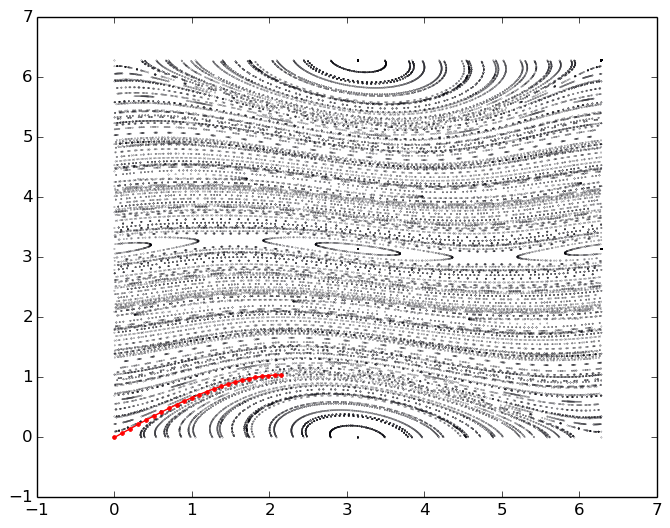

( 0.8123460094785507 t - 0.009033906934722882 t¬≥ + 0.0001397361967527743 t‚Åµ - 2.0738982165943525e-6 t‚Å∑ + ùí™(t‚Å∏),  0.5831757547123116 t - 0.036765757927698775 t¬≥ + 0.0019509397937700751 t‚Åµ - 8.94967685358829e-5 t‚Å∑ + ùí™(t‚Å∏), [0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0, 1.125  ‚Ä¶  1.75, 1.875, 2.0, 2.125, 2.25, 2.375, 2.5, 2.625, 2.75, 2.875], [0.0, 5.44223e-20, 4.4051e-19, 1.51603e-18, 3.69306e-18, 7.47032e-18, 1.34718e-17, 2.24937e-17, 3.55618e-17, 5.40015e-17  ‚Ä¶  3.06239e-16, 4.14429e-16, 5.55112e-16, 7.36713e-16, 9.69493e-16, 1.26586e-15, 1.6407e-15, 2.11179e-15, 2.7002e-15, 3.43073e-15])

In [125]:
VariedadX, VariedadP,ErrorT,ErrorX=CalculoVariedad(ke,2.9,0.125,E,Œªvec)

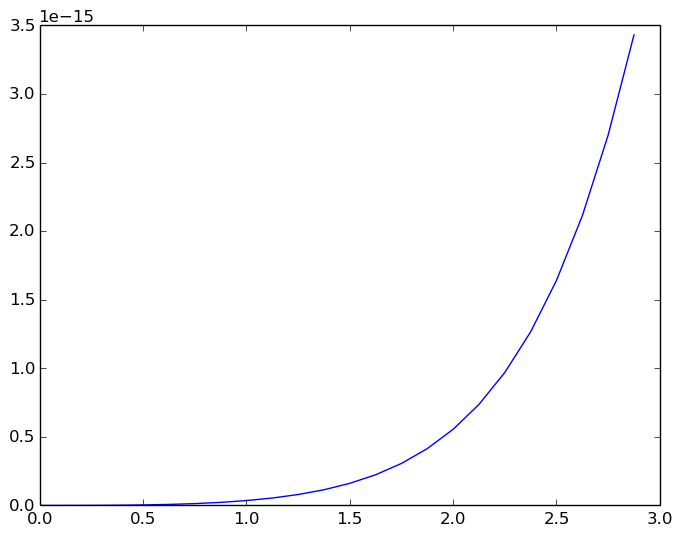

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fee509c27d0>

In [126]:
plot(ErrorT,ErrorX)

Podemos notar que el error crece de manera casi exponencial, aunque el orden del error para t=3.0  es menor a $10^{-15}$